**Problem 2.**
National Unemployment Male Vs. Female (Dataset 2)
In the following data pairs
• X = national unemployment rate for adult males
• Y = national unemployment rate for adult females



<font color='red' size='6'> Removing outlier using Quartile</font>

In [1]:
import pandas as pd
df = pd.read_excel('DS2.xls', engine='xlrd')
print (df)

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
      X    Y
0   2.9  4.0
1   6.7  7.4
2   4.9  5.0
3   7.9  7.2
4   9.8  7.9
5   6.9  6.1
6   6.1  6.0
7   6.2  5.8
8   6.0  5.2
9   5.1  4.2
10  4.7  4.0
11  4.4  4.4
12  5.8  5.2


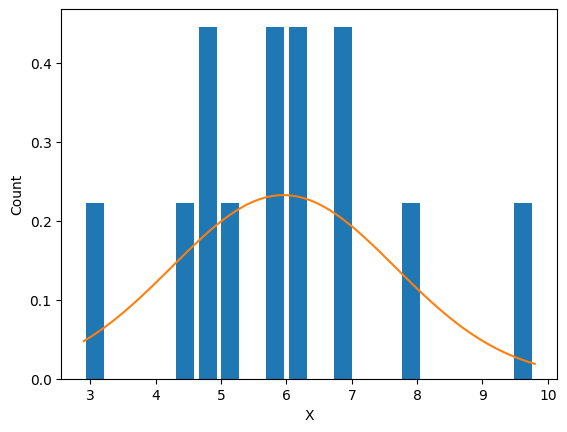

In [2]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
plt.hist(df.X, bins=20, rwidth=0.8, density=True)
plt.xlabel('X')
plt.ylabel('Count')

rng = np.arange(df.X.min(), df.X.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.X.mean(),df.X.std()))

In [3]:
df.Y.skew()

0.4857847761341356

In [4]:
df.X.skew()

0.5769631131083485

In [5]:
df.shape

(13, 2)

<font color='red' size='5'>Detect outliers using percentile</font>

In [6]:
max_thresold = df['X'].quantile(0.95)
max_thresold

8.660000133399997

In [7]:
df[df['X']>max_thresold]

,X,Y
4,9.8,7.9


In [8]:
min_thresold = df['X'].quantile(0.10)
min_thresold

4.4600000378

In [9]:
df[df['X']<min_thresold]

,X,Y
0,2.9,4.0
11,4.4,4.4



<font color='red' size='6'>Remove the outliers and produce new dataframe</font>

In [10]:
df_no_outlier =df[(df['X']<max_thresold) & (df['X']>min_thresold)]
df_no_outlier

,X,Y
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2
10,4.7,4.0
12,5.8,5.2


In [11]:
df_no_outlier.shape

(10, 2)

In [12]:
df.shape

(13, 2)

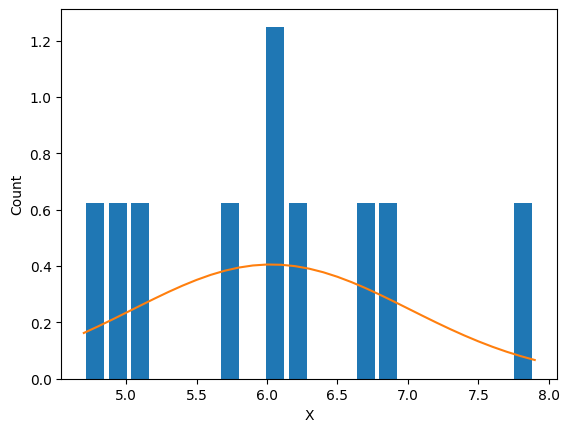

In [13]:
from scipy.stats import norm
import numpy as np
plt.hist(df_no_outlier.X, bins=20, rwidth=0.8, density=True)
plt.xlabel('X')
plt.ylabel('Count')

rng = np.arange(df_no_outlier.X.min(), df_no_outlier.X.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df_no_outlier.X.mean(),df_no_outlier.X.std()))

In [14]:
# collecting x & y
X = df_no_outlier['X'].values
Y = df_no_outlier['Y'].values

# calculate mean of x & y using an inbuilt numpy method mean()
mean_x = np.mean(X)
mean_y = np.mean(Y)
mean_x,mean_y

(6.0299999713, 5.609999942699999)

Regression Equation: Y = 1.02X + -0.56
R-squared: 0.80


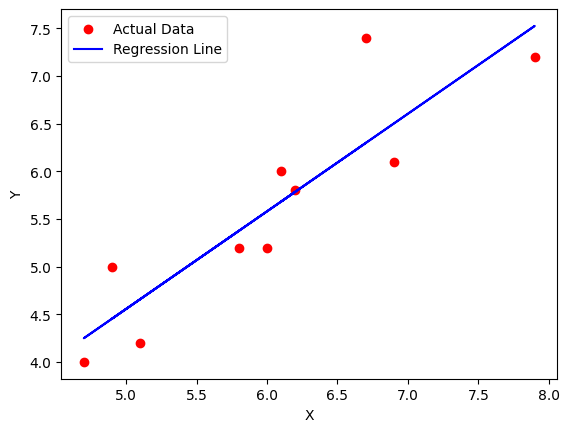

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your data into X and Y

# Calculate the means of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Calculate the slope (m) and intercept (c) using the least squares method
numer = 0
denom = 0
for i in range(len(X)):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

m = numer / denom
c = mean_y - (m * mean_x)

# Create a regression line using the calculated m and c
regression_line = [(m * x) + c for x in X]

# Calculate the coefficient of determination (R-squared)
ssr = 0  # Sum of squared residuals
sst = 0  # Total sum of squares
for i in range(len(X)):
    y_pred = (m * X[i]) + c
    ssr += (Y[i] - y_pred) ** 2
    sst += (Y[i] - mean_y) ** 2

r_squared = 1 - (ssr / sst)

# Plot the data points and regression line
plt.scatter(X, Y, c="red", label="Actual Data")
plt.plot(X, regression_line, label="Regression Line", color="blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Display the regression equation and R-squared value
print(f"Regression Equation: Y = {m:.2f}X + {c:.2f}")
print(f"R-squared: {r_squared:.2f}")

plt.show()


Regression Equation (Training): Y = 1.10X + -1.09
R-squared (Training): 0.75
Mean Squared Error (Test): 0.25
R-squared (Test): 0.02


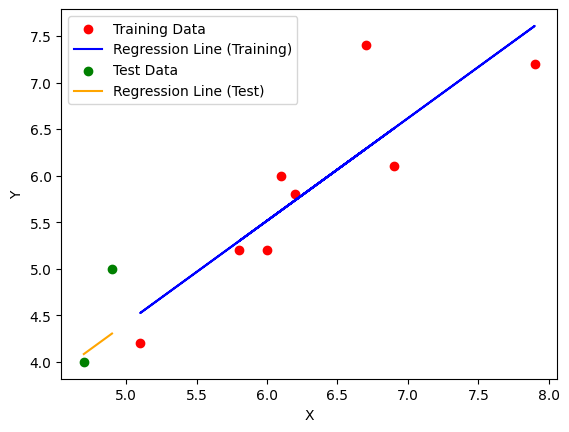

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have loaded your data into X and Y

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate the means of X_train and Y_train
mean_x = np.mean(X_train)
mean_y = np.mean(Y_train)

# Calculate the slope (m) and intercept (c) using the least squares method
numer = 0
denom = 0
for i in range(len(X_train)):
    numer += (X_train[i] - mean_x) * (Y_train[i] - mean_y)
    denom += (X_train[i] - mean_x) ** 2

m = numer / denom
c = mean_y - (m * mean_x)

# Create a regression line using the calculated m and c for training set
regression_line_train = [(m * x) + c for x in X_train]

# Calculate the coefficient of determination (R-squared) for training set
ssr = sum((Y_train - regression_line_train) ** 2)
sst = sum((Y_train - mean_y) ** 2)
r_squared_train = 1 - (ssr / sst)

# Make predictions on the test set
regression_line_test = [(m * x) + c for x in X_test]

# Calculate MSE and R-squared for the test set
mse = mean_squared_error(Y_test, regression_line_test)
r_squared_test = r2_score(Y_test, regression_line_test)

# Plot the data points and regression line for training set
plt.scatter(X_train, Y_train, c="red", label="Training Data")
plt.plot(X_train, regression_line_train, label="Regression Line (Training)", color="blue")

# Plot the data points and regression line for test set
plt.scatter(X_test, Y_test, c="green", label="Test Data")
plt.plot(X_test, regression_line_test, label="Regression Line (Test)", color="orange")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Display the regression equation and R-squared value for training set
print(f"Regression Equation (Training): Y = {m:.2f}X + {c:.2f}")
print(f"R-squared (Training): {r_squared_train:.2f}")

# Display the MSE and R-squared value for test set
print(f"Mean Squared Error (Test): {mse:.2f}")
print(f"R-squared (Test): {r_squared_test:.2f}")

plt.show()
